In [26]:
import pandas as pd
import os as os
import numpy as np
# Creating empty list for broken tooth and healthy gearbox datasets
broken = []
healthy = []

# Defining the path where the datasets are stored
pth1 = 'dataset/BrokenTooth'
pth2 = 'dataset/Healthy'

# Reading the dataset as the list items using the OS library to access the files and read_csv function from pandas to read the daatasets 
# **Reading each file in the BrokenTooth and Healthy directories and appending it to the respective lists as pandas' DataFrame object (abbr.: df)
for file_name in os.listdir(pth1):
    this_df = pd.read_csv(os.path.join(pth1, file_name))
    this_df['load'] = 10*int(file_name[5])
    this_df['gearbox_status'] = 0
    broken.append(this_df)

for file_name in os.listdir(pth2):
    this_df = pd.read_csv(os.path.join(pth2, file_name))
    this_df['load'] = 10*int(file_name[5])
    this_df['gearbox_status'] = 1
    healthy.append(this_df)

print(broken[0])

              a1        a2        a3        a4  load  gearbox_status
0       1.260410 -1.357260 -1.916330  1.845700    10               0
1      -0.126204 -2.272830  0.536155  1.530920    10               0
2      -0.903164 -1.042040 -0.741337  1.650110    10               0
3      -1.693560  2.792950 -0.066998  2.017350    10               0
4      -3.556980  2.114110  0.225473  2.329820    10               0
...          ...       ...       ...       ...   ...             ...
111611 -2.650120 -0.908847 -1.379540  6.474160    10               0
111612 -3.455030  4.149470  0.059362  5.129880    10               0
111613  0.138851  3.311860  0.264506 -0.847989    10               0
111614 -5.326050 -0.911559  0.435160 -2.168490    10               0
111615 -5.691600 -2.190750  0.029839 -0.027178    10               0

[111616 rows x 6 columns]


In [ ]:
# Aggregating dataset based on health status
broken_agg = broken[0]
healthy_agg = healthy[0]
for i in range(1,10):
    broken_agg = pd.concat([broken_agg, broken[i]], ignore_index=True)
    healthy_agg = pd.concat([healthy_agg, healthy[i]], ignore_index=True)

print(broken[0])

In [38]:
import math

def divide_into(df, n):
    group_size = n
    df_groups = []
    for i in range(math.ceil(df['a1'].count()/group_size)):
        df_groups.append(df.iloc[i*group_size:(i+1)*group_size, :])
    return pd.DataFrame(map(pd.DataFrame.std, df_groups))

broken_stdev = []
for i in range(0,10):
    broken_stdev.append(divide_into(broken[i], 100))
    
x = broken_stdev[0]
print(x)
x.describe()
# print(broken_stdev[0].describe())

healthy_stdev = []
for i in range(0,10):
    healthy_stdev.append(divide_into(healthy[i], 100))
#healthy_stdev[0].describe()

            a1        a2        a3        a4  load  gearbox_status
0     3.947241  2.625565  3.075201  2.759145   0.0             0.0
1     3.768801  3.270266  2.846681  3.223817   0.0             0.0
2     3.318944  4.121886  2.990541  3.178636   0.0             0.0
3     5.918385  4.390473  3.856991  4.703490   0.0             0.0
4     2.621164  3.098193  2.674376  2.385791   0.0             0.0
...        ...       ...       ...       ...   ...             ...
1112  2.590362  3.094107  2.297680  2.346342   0.0             0.0
1113  3.397182  3.866719  3.163785  3.127293   0.0             0.0
1114  2.893202  4.044202  2.679493  2.321979   0.0             0.0
1115  1.981846  2.945338  2.128224  1.803724   0.0             0.0
1116  2.168833  2.361102  1.187357  2.314798   0.0             0.0

[1117 rows x 6 columns]


In [39]:

healthy_stdev = []
for i in range(0,10):
    healthy_stdev.append(divide_into(healthy[i], 100))
healthy_stdev[0].describe()

,a1,a2,a3,a4,load,gearbox_status
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.0,1014.0
mean,7.977868,4.508825,4.524734,5.023384,0.0,0.0
std,1.901164,1.062845,0.905528,1.041694,0.0,0.0
min,3.647979,2.216306,2.190477,2.342912,0.0,0.0
25%,6.640625,3.761419,3.849238,4.277768,0.0,0.0
50%,7.794336,4.331831,4.465215,5.030871,0.0,0.0
75%,9.179772,4.998668,5.111073,5.692613,0.0,0.0
max,15.776174,9.692683,7.495185,9.418170,0.0,0.0


In [16]:
dataset = pd.concat([broken_stdev[0], healthy_stdev[0]], axis=0)
dataset.describe()

,a1,a2,a3,a4,load,gearbox_status
count,2131.000000,2131.000000,2131.000000,2131.000000,2131.0,2131.0
mean,5.650914,4.165668,3.767001,4.086204,0.0,0.0
std,2.662306,1.100169,1.120914,1.317695,0.0,0.0
min,1.519307,1.341292,0.990336,1.266873,0.0,0.0
25%,3.402497,3.448920,2.956976,3.101993,0.0,0.0
50%,4.985057,4.071910,3.683986,3.979254,0.0,0.0
75%,7.629193,4.766559,4.528482,5.031311,0.0,0.0
max,15.776174,9.692683,7.495185,9.418170,0.0,0.0


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

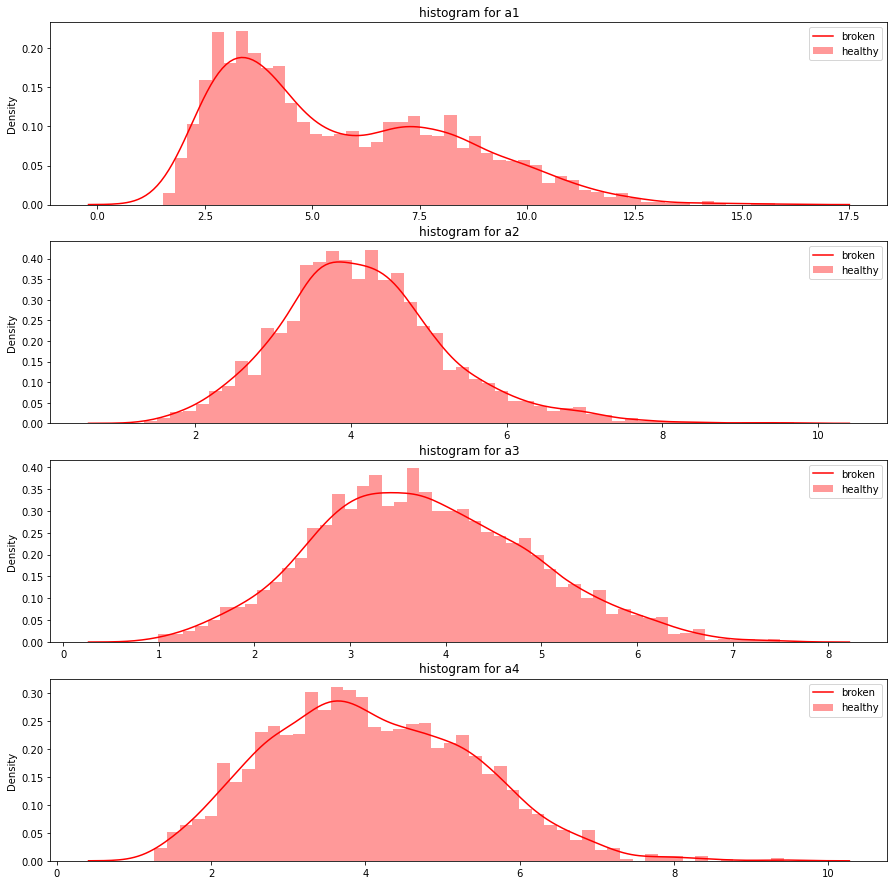

In [23]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from pylab import rcParams

plt.figure(figsize=(15,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(dataset[['a1','a2','a3','a4']]):
    ax = plt.subplot(gs[i])
    sns.distplot(dataset[cn][dataset.gearbox_status == 0], bins=50, color="red")
    sns.distplot(dataset[cn][dataset.gearbox_status == 1], bins= 50, color="lime")
    ax.set_xlabel('')
    plt.legend(['healthy', 'broken'])
    ax.set_title('histogram for ' + str(cn))
plt.show()